# Prediction of automobile performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [4]:
# Loaing the dataset
df=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\Datasets\data.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [6]:
df.shape

(36, 5)

In [7]:
df_new=df.drop(['Car','Model'],axis=1)
df_new.head()

#df.drop([''],inplace=True) this helps to save chabges on the dataset

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


In [8]:
print(df_new.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [15]:
print(df_new.describe())

            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


# Multiple Linear regression
- y(CO2 emission)=b0 + b1 * x1(volume) + b2 * x2(weight)


In [28]:
# set the independent and dependednt variables
X=df_new[['Volume','Weight']]
y=df_new['CO2']

<Axes: >

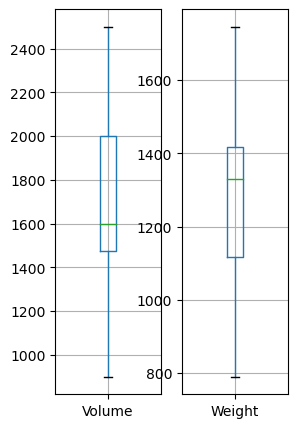

In [29]:
#Check for the outliers # Matplotlib.pyplot
fig,ax = plt.subplots(1, 2, figsize =(3,5))
df_new.boxplot('Volume', ax=ax[0])
df_new.boxplot('Weight',ax=ax[1])


# Exploratory data analysis

C:\Users\user\AppData\Local\Temp\ipykernel_6728\3265562361.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['CO2'])


<Axes: xlabel='CO2', ylabel='Density'>

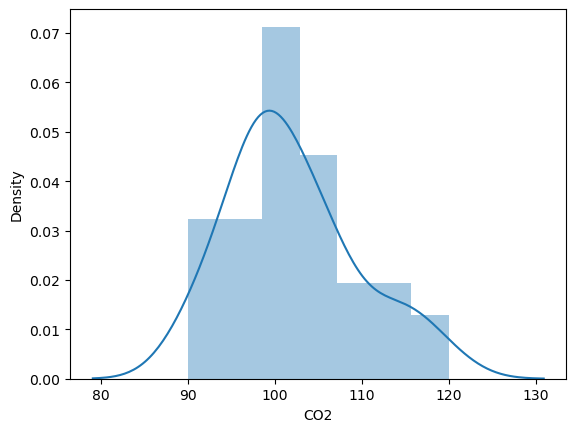

In [30]:
sns.distplot(df_new['CO2'])

- conclusion: it is normally distributed

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


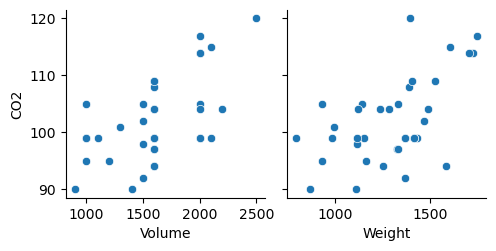

In [31]:
# Relationship of CO2 with other variables
sns.pairplot(df_new,x_vars=['Volume','Weight'], y_vars='CO2',aspect=1,kind='scatter')
plt.show()

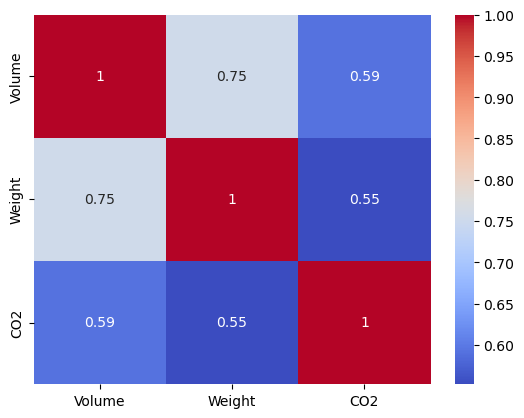

In [34]:
# Create a correlation matrix and represent it as a heatmap
sns.heatmap(df_new.corr(), annot= True, cmap='coolwarm')
plt.show()

In [35]:
# Split the data set into train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [36]:
y_train.shape

(25,)

In [37]:
y_test.shape

(11,)

In [43]:
lr.intercept_

88.08532861350425

In [44]:
lr.coef_

array([ 0.01593236, -0.0097475 ])

In [46]:
list(zip(X,lr.coef_))

[('Volume', 0.015932359262139015), ('Weight', -0.00974750313818417)]

In [47]:
y_pred=lr.predict(X_test)
x_pred=lr.predict(X_train)

In [48]:
y_pred.shape

(11,)

In [49]:
print("prediction for test set : {}".format(y_pred))

prediction for test set : [ 93.99286173  97.70377541 102.93090666  98.73165615 100.02807407
 108.23794128 110.65971497 106.03061266  99.88186152 103.33055429
  99.14736755]


In [50]:
#Actual value and predicted value
lr_diff=pd.DataFrame({'Actual value': y_test,"predicted value":y_pred})
lr_diff

,Actual value,predicted value
3,90,93.992862
25,102,97.703775
31,117,102.930907
28,109,98.731656
33,108,100.028074
22,99,108.237941
17,104,110.659715
21,99,106.030613
34,109,99.881862
29,114,103.330554


In [51]:
y_test.shape


(11,)

Text(0, 0.5, 'CO2 emission')

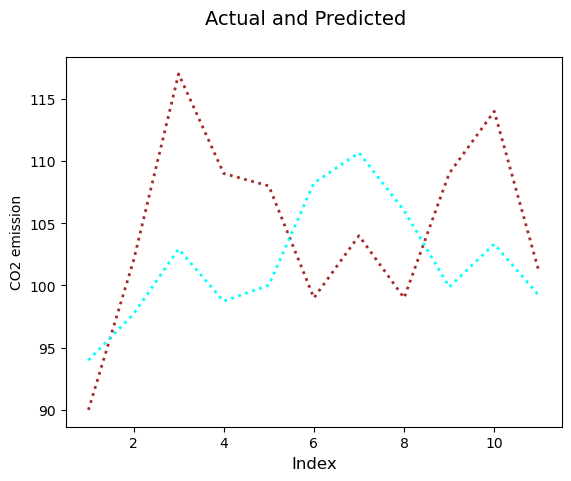

In [56]:
c=[i for i in range(1,12,1)] # for generaing index numbers
fig=plt.figure()
plt.plot(c,y_test,color='brown',linewidth=2,linestyle=":")
plt.plot(c,y_pred,color='cyan',linewidth=2,linestyle=':')
fig.suptitle("Actual and Predicted",fontsize=14)
plt.xlabel('Index',fontsize=12)
plt.ylabel('CO2 emission')

Text(0, 0.5, 'ytest-ypred')

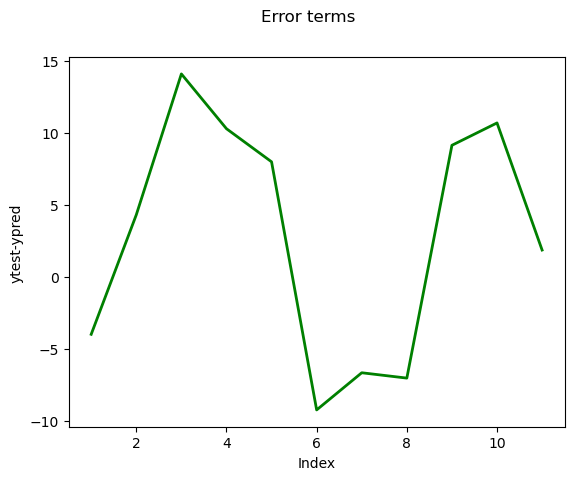

In [58]:
#Error terms
c=[i for i in range(1,12,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='green',linewidth=2,linestyle='-')
fig.suptitle('Error terms',fontsize=12)
plt.xlabel('Index',fontsize=10)
plt.ylabel('ytest-ypred',fontsize=10)

# Evaluation of the model

In [61]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(r2)

70.98736467592678
7.7424486358651885
-0.32758440893155205
